![head.png](https://github.com/cafawo/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Value at Risk

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

In this assignment you will work with data that is stored in a file named **02_python_data.csv**, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

### Task: 

Load the data and show in a single plot the cumulative log-returns of '.GDAXI' as well as an equally weighted portfolio of its constituents (all the other assets in 02_python_data.csv, excluding '.GDAXI').

              .GDAXI    SAPG.DE  SIEGn.DE  DTEGn.DE  AIRG.DE  ALVG.DE  \
Date                                                                    
2022-04-29  14097.88  97.026932    117.78    17.570   105.50   216.20   
2022-05-02  13939.07  95.982669    115.12    17.290   103.96   215.00   
2022-05-03  14039.47  94.729554    114.56    17.376   106.44   217.00   
2022-05-04  13970.82  92.979171    115.78    17.530   102.68   213.55   
2022-05-05  13902.52  94.699718    116.58    17.592   108.96   199.76   

            MBGn.DE  VOWG_p.DE  BMWG.DE  SHLG.DE  ...  CONG.DE  HEIG.DE  \
Date                                              ...                     
2022-04-29    67.10     148.94    78.51    51.26  ...    66.02    55.26   
2022-05-02    62.22     147.22    77.64    50.22  ...    62.46    54.74   
2022-05-03    62.88     150.20    79.98    50.42  ...    64.32    55.22   
2022-05-04    62.33     148.52    79.47    51.98  ...    63.30    55.42   
2022-05-05    61.00     147.18    78.0

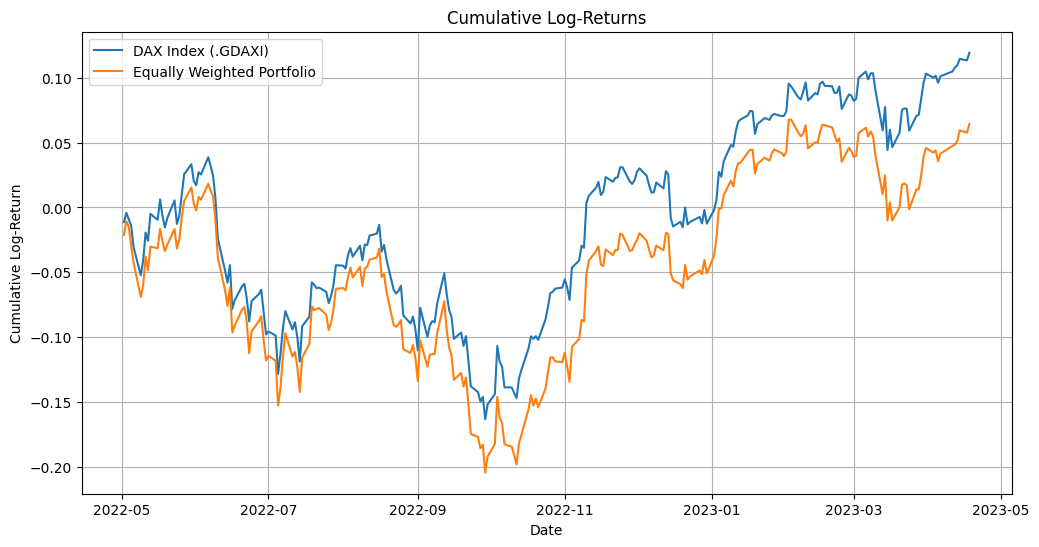

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the stock price data
file_path = '02_python_data.csv'
prices = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Display the first few rows of the data
print(prices.head())

# Step 2: Calculate daily log-returns
log_returns = np.log(prices / prices.shift(1)).dropna()

# Step 3: Calculate cumulative log-returns
# '.GDAXI' log-returns
gdaxi_log_returns = log_returns['.GDAXI']
cumulative_gdaxi_log_returns = gdaxi_log_returns.cumsum()

# Equally weighted portfolio log-returns (excluding '.GDAXI')
constituents_log_returns = log_returns.drop(columns=['.GDAXI'])
equal_weighted_log_returns = constituents_log_returns.mean(axis=1)
cumulative_equal_weighted_log_returns = equal_weighted_log_returns.cumsum()

# Step 4: Plot the cumulative log-returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_gdaxi_log_returns, label='DAX Index (.GDAXI)')
plt.plot(cumulative_equal_weighted_log_returns, label='Equally Weighted Portfolio')
plt.title('Cumulative Log-Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Log-Return')
plt.legend()
plt.grid(True)
plt.show()


### Task: 

We now want to compare the risk of **both** portfolios from the previous task ('.GDAXI and the equally weighted portfolio'). To do so, calculate the 95% 1-day [Value at Risk (VaR)](https://en.wikipedia.org/wiki/Value_at_risk), using:

* Historical simulation,
* the Parametric method,
* Monte Carlo simulation.

Add all values to a data frame and `display()`

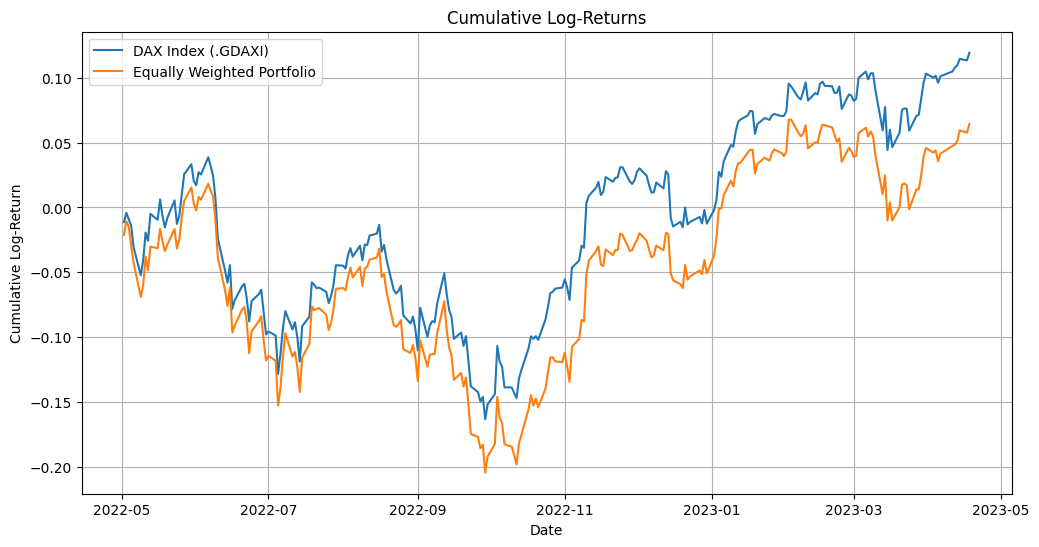

,VaR Method,DAX Index (.GDAXI),Equally Weighted Portfolio
0,Historical,0.019456,0.021996
1,Parametric,0.019416,0.020908
2,Monte Carlo,0.019206,0.020893


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load the stock price data
file_path = '02_python_data.csv'
prices = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Calculate daily log-returns
log_returns = np.log(prices / prices.shift(1)).dropna()

# Calculate cumulative log-returns
gdaxi_log_returns = log_returns['.GDAXI']
cumulative_gdaxi_log_returns = gdaxi_log_returns.cumsum()

constituents_log_returns = log_returns.drop(columns=['.GDAXI'])
equal_weighted_log_returns = constituents_log_returns.mean(axis=1)
cumulative_equal_weighted_log_returns = equal_weighted_log_returns.cumsum()

# Plot the cumulative log-returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_gdaxi_log_returns, label='DAX Index (.GDAXI)')
plt.plot(cumulative_equal_weighted_log_returns, label='Equally Weighted Portfolio')
plt.title('Cumulative Log-Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Log-Return')
plt.legend()
plt.grid(True)
plt.show()

# VaR calculations
confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)

# Historical VaR
VaR_historical_gdaxi = -gdaxi_log_returns.quantile(1 - confidence_level)
VaR_historical_equal_weighted = -equal_weighted_log_returns.quantile(1 - confidence_level)

# Parametric VaR
mean_gdaxi = gdaxi_log_returns.mean()
std_gdaxi = gdaxi_log_returns.std()
VaR_parametric_gdaxi = -(mean_gdaxi + z_score * std_gdaxi)

mean_equal_weighted = equal_weighted_log_returns.mean()
std_equal_weighted = equal_weighted_log_returns.std()
VaR_parametric_equal_weighted = -(mean_equal_weighted + z_score * std_equal_weighted)

# Monte Carlo VaR
num_simulations = 100000
simulated_gdaxi_returns = np.random.normal(mean_gdaxi, std_gdaxi, num_simulations)
simulated_equal_weighted_returns = np.random.normal(mean_equal_weighted, std_equal_weighted, num_simulations)

VaR_monte_carlo_gdaxi = -np.percentile(simulated_gdaxi_returns, (1 - confidence_level) * 100)
VaR_monte_carlo_equal_weighted = -np.percentile(simulated_equal_weighted_returns, (1 - confidence_level) * 100)

# Create DataFrame with VaR values
var_data = {
    'VaR Method': ['Historical', 'Parametric', 'Monte Carlo'],
    'DAX Index (.GDAXI)': [VaR_historical_gdaxi, VaR_parametric_gdaxi, VaR_monte_carlo_gdaxi],
    'Equally Weighted Portfolio': [VaR_historical_equal_weighted, VaR_parametric_equal_weighted, VaR_monte_carlo_equal_weighted]
}

var_df = pd.DataFrame(var_data)

# Display the DataFrame
display(var_df)


### Task: 

In order to visualize the VaR results we focus only on '.GDAXI' (you can create `plt.subplots()` for the equally weighted portfolio if you like). In the plot:

1. Plot a histogram of the returns
2. Add a line plot of the normal distribution (parameterized to the returns)
3. Add indicators for the 3 VaRs (vertical lines or annotations)

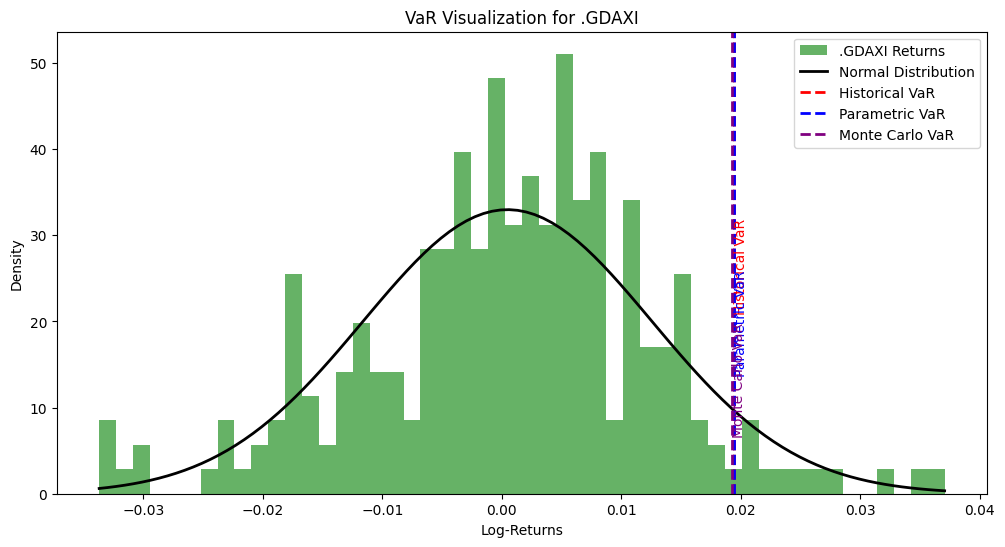

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load the stock price data
file_path = '02_python_data.csv'
prices = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Calculate daily log-returns
log_returns = np.log(prices / prices.shift(1)).dropna()

# Extract '.GDAXI' log-returns
gdaxi_log_returns = log_returns['.GDAXI']

# Define confidence level and calculate z-score
confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)

# Historical VaR
VaR_historical_gdaxi = -gdaxi_log_returns.quantile(1 - confidence_level)

# Parametric VaR
mean_gdaxi = gdaxi_log_returns.mean()
std_gdaxi = gdaxi_log_returns.std()
VaR_parametric_gdaxi = -(mean_gdaxi + z_score * std_gdaxi)

# Monte Carlo VaR
num_simulations = 100000
simulated_gdaxi_returns = np.random.normal(mean_gdaxi, std_gdaxi, num_simulations)
VaR_monte_carlo_gdaxi = -np.percentile(simulated_gdaxi_returns, (1 - confidence_level) * 100)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Histogram of '.GDAXI' returns
ax.hist(gdaxi_log_returns, bins=50, density=True, alpha=0.6, color='g', label='.GDAXI Returns')

# Normal distribution line plot
x = np.linspace(gdaxi_log_returns.min(), gdaxi_log_returns.max(), 100)
p = norm.pdf(x, mean_gdaxi, std_gdaxi)
ax.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Add vertical lines for VaR
ax.axvline(x=VaR_historical_gdaxi, color='r', linestyle='--', linewidth=2, label='Historical VaR')
ax.axvline(x=VaR_parametric_gdaxi, color='b', linestyle='--', linewidth=2, label='Parametric VaR')
ax.axvline(x=VaR_monte_carlo_gdaxi, color='purple', linestyle='--', linewidth=2, label='Monte Carlo VaR')

# Annotations
ax.text(VaR_historical_gdaxi, max(p)*0.8, 'Historical VaR', color='r', rotation=90, verticalalignment='center')
ax.text(VaR_parametric_gdaxi, max(p)*0.6, 'Parametric VaR', color='b', rotation=90, verticalalignment='center')
ax.text(VaR_monte_carlo_gdaxi, max(p)*0.4, 'Monte Carlo VaR', color='purple', rotation=90, verticalalignment='center')

# Labels and title
ax.set_xlabel('Log-Returns')
ax.set_ylabel('Density')
ax.set_title('VaR Visualization for .GDAXI')
ax.legend()

# Show plot
plt.show()
